# **Project Name**    -  Superstore Sales Analysis


##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Team
##### **Team Name** - SemantiX
##### **Team Member 1** - Anuj kumar singh
##### **Team Member 2** - Arghadeep Nath
##### **Team Member 3** - Ritvik sachadeva
##### **Team Member 4** - Ritika tyagi

# **Project Summary -**

Here is a concise summary of your dataset analysis and machine learning model implementation:

### Dataset Overview
- **Dataset Loaded:** `train.csv` using pandas.
- **Row and Column Count:** Verified using `data.index.value_counts().sum()` and `data.columns.value_counts().sum()`.
- **Dataset Information:** Obtained using `data.info()` which provided data types and non-null counts.
- **Duplicate Values:** Identified and counted using `data[data.duplicated()].sum()`.
- **Missing Values:** Counted using `data.isnull().sum()`.
- **Missing Values Visualization:** Created a bar plot to show missing values in each column.

### Descriptive Statistics
- **Summary Statistics:** Retrieved using `data.describe()`.
- **Unique Values Check:** Examined unique values for 'Country', 'City', 'State', and 'Region'.

### Data Preprocessing
- **Missing Values Imputation:** Filled missing values in 'Postal Code' with 0.
- **Outlier Treatment:** Used the interquartile range (IQR) to determine thresholds for outliers in 'Sales', filtering values outside the range.
- **Categorical Encoding:**
  - Applied `OrdinalEncoder` for 'Ship Mode'.
  - Applied `OneHotEncoder` for 'Segment', 'Region', and 'Category'.
- **Feature Scaling:** Standardized 'Sales' using `StandardScaler`.

### Train-Test Split
- **Feature Selection:** Defined features `X` (including 'Segment', 'Region', 'Category', 'Ship Mode') and target `Y` (Sales).
- **Data Splitting:** Split the data into training and testing sets (80-20) using `train_test_split`.

### Machine Learning Models
#### Model 1: Linear Regression
- **Training:** Utilized `LinearRegression()` to fit the model on training data.
- **Evaluation:** Measured performance using Mean Squared Error (MSE) and R-squared (R2) score on the test set.
- **Results:** MSE: `mse`, R2: `r2`.

#### Model 2: Support Vector Regression (SVR)
- **Training:** Trained the model using `SVR()`.
- **Evaluation:** Calculated MSE and R2 score on the training set.
- **Results:** MSE on training data: `mse_train`, R2 on training data: `r2_train`.

#### Model 3: Decision Tree Regressor
- **Training:** Implemented using `DecisionTreeRegressor()`.
- **Evaluation:** Assessed using MSE and R2 score on the test set.
- **Results:** MSE: `mse`, R2: `r2`.

### Summary of Results
- **Linear Regression:** Achieved an MSE of `mse` and an R2 score of `r2` on the test data.
- **SVR:** Achieved an MSE of `mse_train` and an R2 score of `r2_train` on the training data.
- **Decision Tree Regressor:** Achieved an MSE of `mse` and an R2 score of `r2` on the test data.

### Conclusion
Your analysis involved loading and understanding the dataset, preprocessing the data to handle missing values and outliers, encoding categorical features, scaling numerical features, and splitting the data into training and testing sets. Three machine learning models (Linear Regression, SVR, Decision Tree Regressor) were implemented and evaluated. Each model’s performance was assessed using MSE and R2 scores, providing a comparison of their effectiveness in predicting 'Sales'.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


                                  
A simple problem statement for a project on super store analysis:
In the competitive retail market, superstores must continuously optimize their operations and enhance customer satisfaction to maintain and grow their market share. A superstore is facing challenges in understanding its sales performance, customer behavior, and inventory management. Despite having vast amounts of data, the superstore struggles to extract actionable insights to drive strategic decisions.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
data = pd.read_csv('train.csv')


### Dataset First View

In [ ]:
# Dataset First Look
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21-05-2017,28-05-2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.index.value_counts().sum()

9800

In [ ]:
data.columns.value_counts().sum()

18

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_rows = data[data.duplicated()].sum()
duplicate_rows


Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country            0
City               0
State              0
Postal Code      0.0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales            0.0
dtype: object

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
null = data.isnull().sum()
null

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Row ID'),
  Text(1, 0, 'Order ID'),
  Text(2, 0, 'Order Date'),
  Text(3, 0, 'Ship Date'),
  Text(4, 0, 'Ship Mode'),
  Text(5, 0, 'Customer ID'),
  Text(6, 0, 'Customer Name'),
  Text(7, 0, 'Segment'),
  Text(8, 0, 'Country'),
  Text(9, 0, 'City'),
  Text(10, 0, 'State'),
  Text(11, 0, 'Postal Code'),
  Text(12, 0, 'Region'),
  Text(13, 0, 'Product ID'),
  Text(14, 0, 'Category'),
  Text(15, 0, 'Sub-Category'),
  Text(16, 0, 'Product Name'),
  Text(17, 0, 'Sales')])

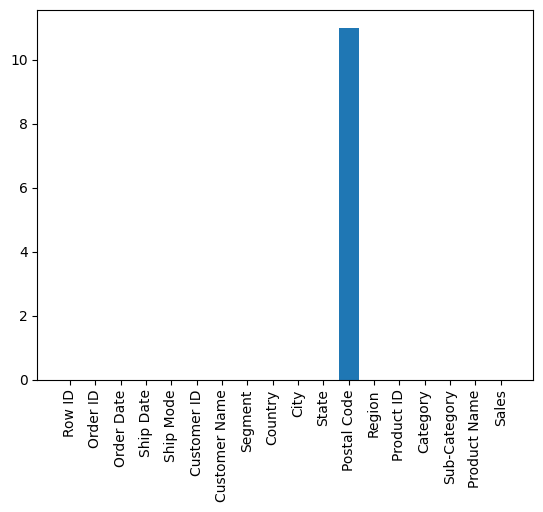

In [ ]:
# Visualizing the missing values
plt.bar(data.columns,null)
plt.xticks(rotation="vertical")

### What did you know about your dataset?

This dataset consists of 9800 rows and 18 columns of data on a super store like the Customer ID, Customer Name, Product ID, Product Name, Order ID, Ship Date, Postal Code and other related data in which we have got zero duplicate data and 11 null values for Postal Code in the whole dataset.





## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data['Country'].unique()


array(['United States'], dtype=object)

In [ ]:
data['City'].unique()
data['City'].nunique()

529

In [ ]:
data['State'].unique()
data['State'].nunique()

49

In [ ]:
data['Region'].unique()
data['Region'].nunique()

4

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
data['Postal Code'].fillna(0,inplace = True)
null2=data['Postal Code'].isnull().sum()
null2


0

### What all manipulations have you done and insights you found?

We have used the above concept to remove all the null values from the Postal Code column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

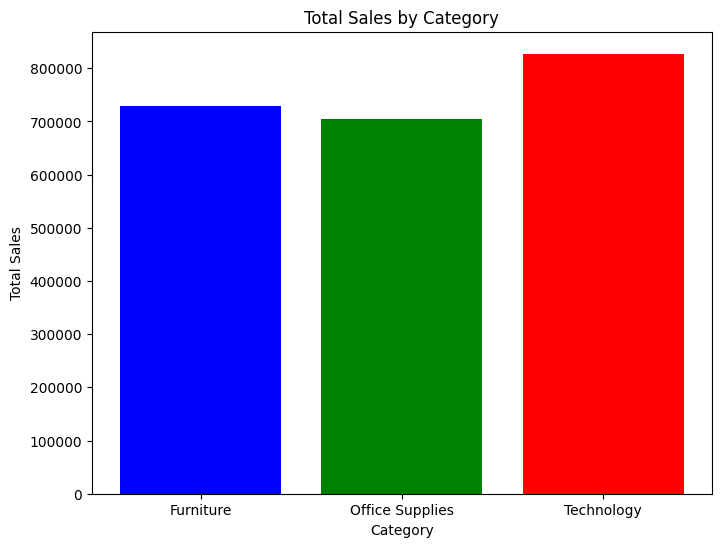

In [ ]:
# Chart - 1 visualization code

sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(sales_by_category['Category'], sales_by_category['Sales'], color=['blue', 'green', 'red'])
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.show()


##### 1. Why did you pick the specific chart?

The above chart, i.e., bar plot is used here because it is a categorical data that's being displayed which is the Total Sales by category.
Also, it tells us about different categories, people are buying from and helps us in upcoming used plots and charts.

##### 2. What is/are the insight(s) found from the chart?

From this chart we now know about the total sales in different categories like, around 720000 sales in furniture, 700000 sales in office supplies and 820000 sales in technology category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights do help in creating a positive business impact like identifying high-performing categories, competitive benchmarking, improving resource allocation, etc.
Based on the provided information, there doesn't appear to be any indication of negative growth as each category is showing very good sales figures, suggesting overall positive performance.

#### Chart - 2

<Figure size 1400x800 with 0 Axes>

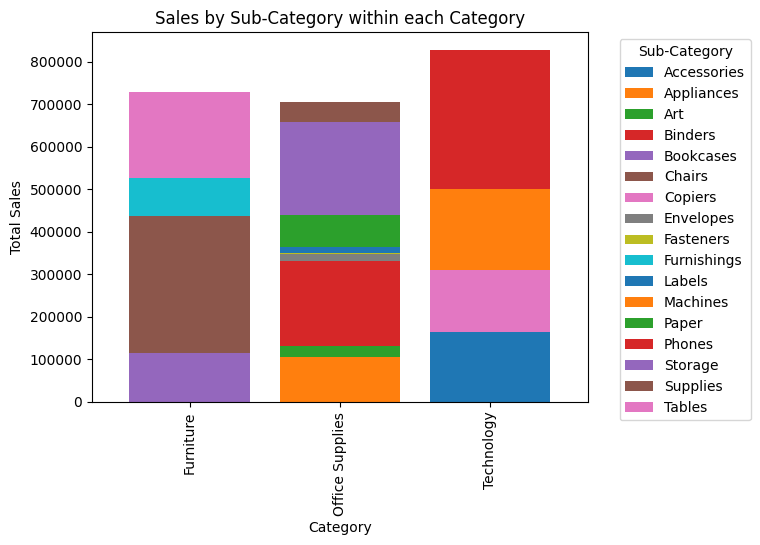

In [ ]:
# Chart - 2 visualization code

plt.figure(figsize=(14, 8))
sales_by_subcategory = data.groupby(['Category', 'Sub-Category'])['Sales'].sum().unstack()
sales_by_subcategory.plot(kind='bar', stacked=True, width=0.8)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Sales by Sub-Category within each Category')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


##### 1. Why did you pick the specific chart?

The above chart, i.e., bar plot is used here because it is a categorical data that's being displayed which is the sales by sub-category within each category. Also, it tells us about different sub-categories within the categories, people are buying from.

##### 2. What is/are the insight(s) found from the chart?

From this chart just like chart 1 we know about the total sales in different categories like, around 720000 sales in furniture, 700000 sales in office supplies and 820000 sales in technology category but we also get to know about total sales in sub-categories withi each category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help in creating a positive business impact just like chart 1 but it does provide with additional benefits now like how much more resource and time should invested more efficiently on sub-categories with less sales

#### Chart - 3

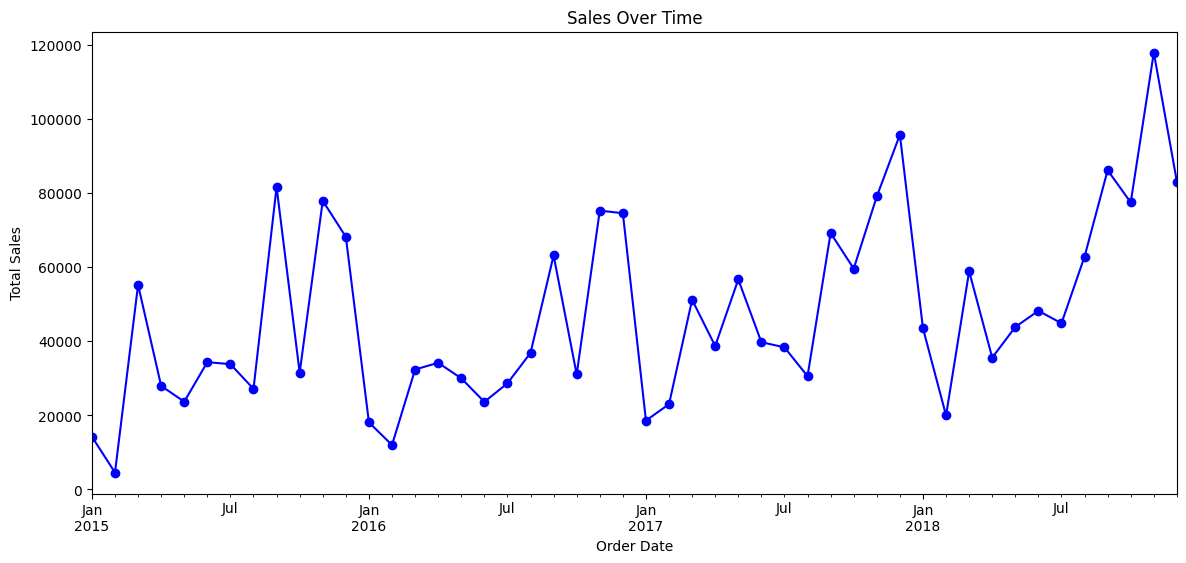

In [ ]:
# Chart - 3 visualization code

data['Order Date'] = pd.to_datetime(data['Order Date'], format="%d-%m-%Y")
plt.figure(figsize=(14, 6))
sales_over_time = data.groupby(data['Order Date'].dt.to_period("M"))['Sales'].sum()
sales_over_time.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Sales Over Time')
plt.show()


##### 1. Why did you pick the specific chart?

The above chart, i.e., line plot is used here because it is a numerical data that's being displayed which is the sales over time, i.e., how much total sales were made in which month of the year.

##### 2. What is/are the insight(s) found from the chart?

From this chart we know about the total sales in different months and we also get to know about minimum and maximum total sales every 6 months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help in creating a positive business impact like providing with essential data ,i.e., at what mean time of the year the sales were the most so that the company can make predictions for future for investing with lesser chances of losses but more chances of gaining profits and will also help the company know that their plans require revists and should be replanned for times with least sales.

#### Chart - 4

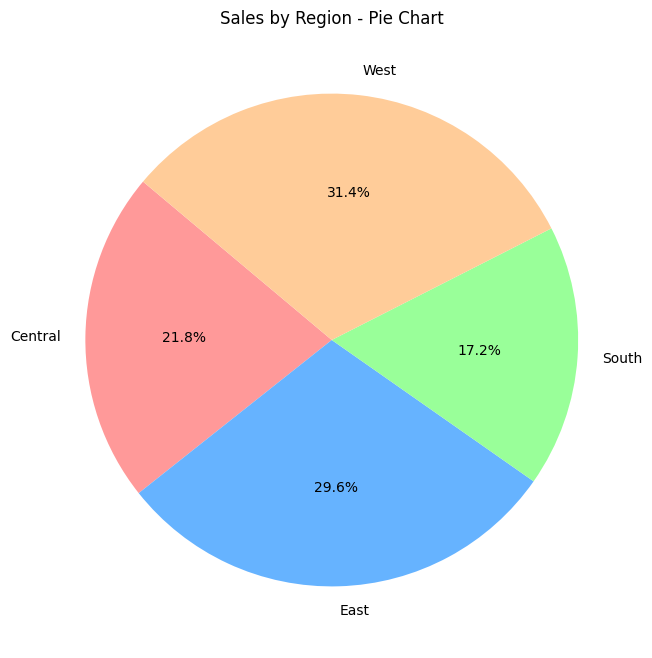

In [ ]:
# Chart - 4 visualization code
region_sales = data.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Sales by Region - Pie Chart')
plt.show()


##### 1. Why did you pick the specific chart?

The above chart, i.e., pie plot is used here because it is a numerical data that's being displayed which is the sales by region.

##### 2. What is/are the insight(s) found from the chart?

From this chart we know about the sales by region, like, around 31.4% of the sales were made in the western region, 17.2% in southern region, 29.6% in eastern region and 21.8% in central region.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help in creating a positive business impact like providing with essential data ,i.e., in which region the sales were the most so that the company can make predictions for future for investing with lesser chances of losses but more chances of gaining profits and will also help the company know that their plans require revists and should be replanned for regions with least sales.

#### Chart - 5

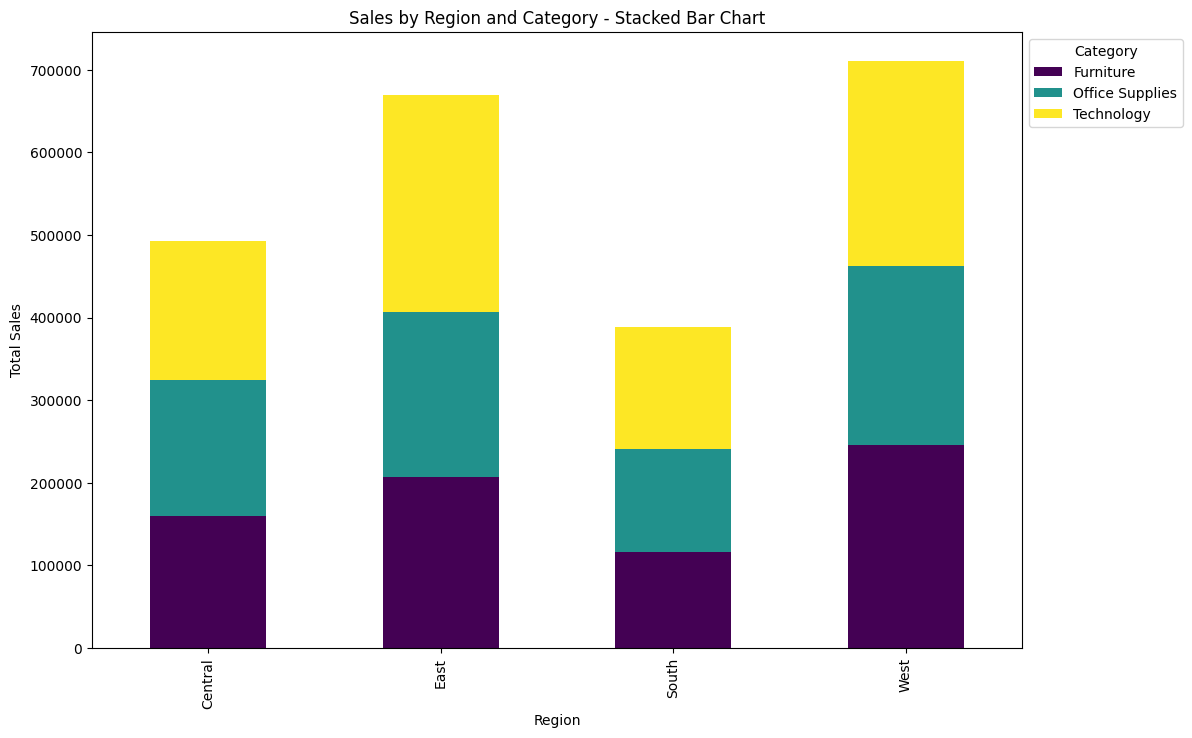

In [ ]:
# Chart - 5 visualization code
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')

region_category_sales = data.groupby(['Region', 'Category'])['Sales'].sum().unstack()
#unstack remove karoge to single single lines banke ayenge jese north ka techn, furt, and office 3 alag lines honge

region_category_sales.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Region and Category - Stacked Bar Chart')

plt.legend(title='Category', bbox_to_anchor=(1, 1))

plt.show()


##### 1. Why did you pick the specific chart?

The above chart, i.e., bar plot is used here because it is a categorical data that's being displayed which is the sales by region and category.

##### 2. What is/are the insight(s) found from the chart?

From this chart we know about the sales by region and category displaying all the essential data of chart 1 and chart 4 collectively in a single chart.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights do help in creating a positive business impact like identifying high-performing categories, competitive benchmarking, improving resource allocation, etc and also help by providing with essential data ,i.e., in which region the sales were the most so that the company can make predictions for future for investing with lesser chances of losses but more chances of gaining profits and will also help the company know that their plans require revists and should be replanned for regions with least sales.

Based on the provided information, there doesn't appear to be any indication of negative growth as each category is showing very good sales figures, suggesting overall positive performance.



#### Chart - 6

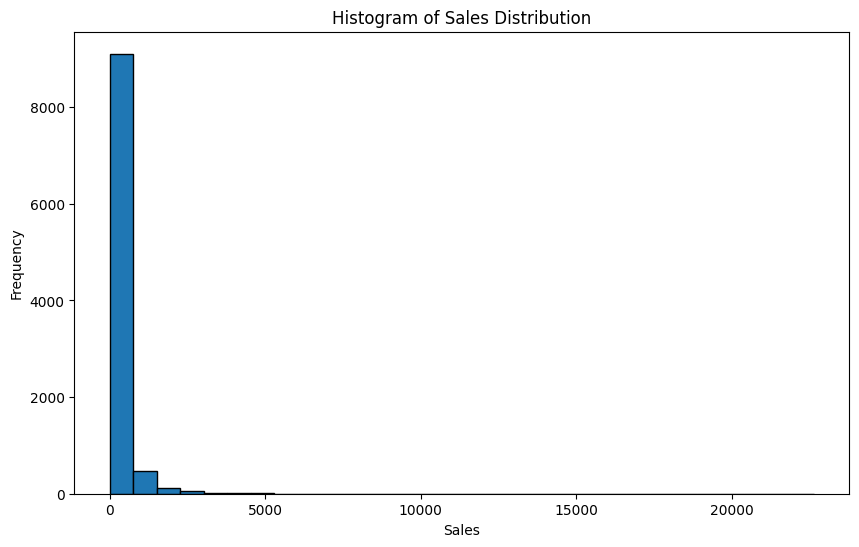

In [ ]:
# Chart - 6 visualization code

plt.figure(figsize=(10, 6))
plt.hist(data['Sales'], bins=30, edgecolor='black')
plt.title('Histogram of Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

The above chart, i.e., histogram is used here because it is a numerical data that's being displayed which is the sales distribution.

##### 2. What is/are the insight(s) found from the chart?

From this chart we know about the sales distribution and tells us about frquency for amount of sale.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights do help in creating a positive business impact like it tells the company about its customers as they now know the mean budget of the customers and this will help them further in launching products that match the mean budget of the customers.

#### Chart - 7

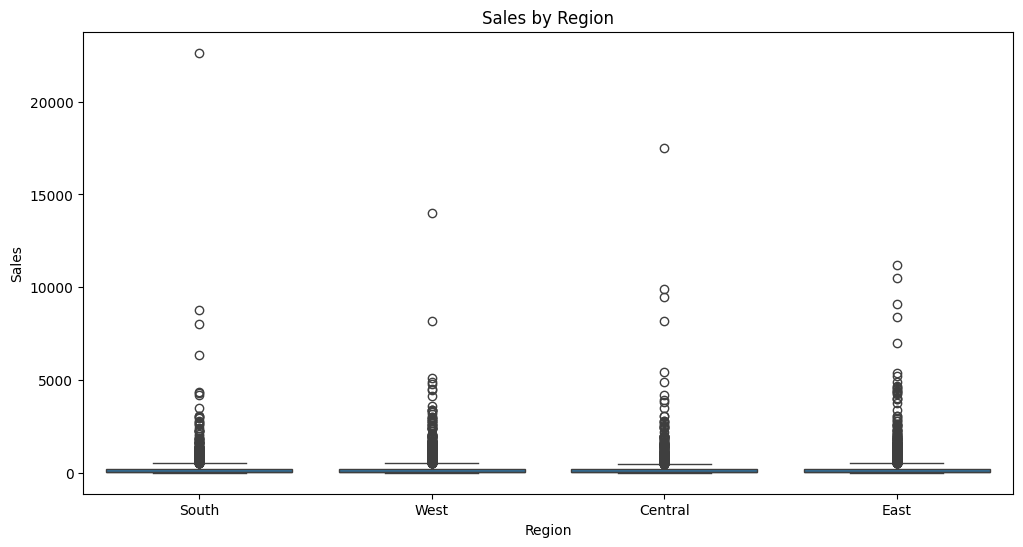

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Sales', data=data)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()



##### 1. Why did you pick the specific chart?

The above chart, i.e., box plot is used here because it is a numerical vs categorical data that's being displayed which is the sales by region.

##### 2. What is/are the insight(s) found from the chart?

From this chart we know about the sales by region and also tells us about the outliers of sales in different regions and a common pattern of sale.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights do help in creating a positive business impact as it tells about the range of the maximum sales in each region which is between 0 and 5000 and this further will help the company to know that what and how much should be invested respectively.

#### Chart - 8

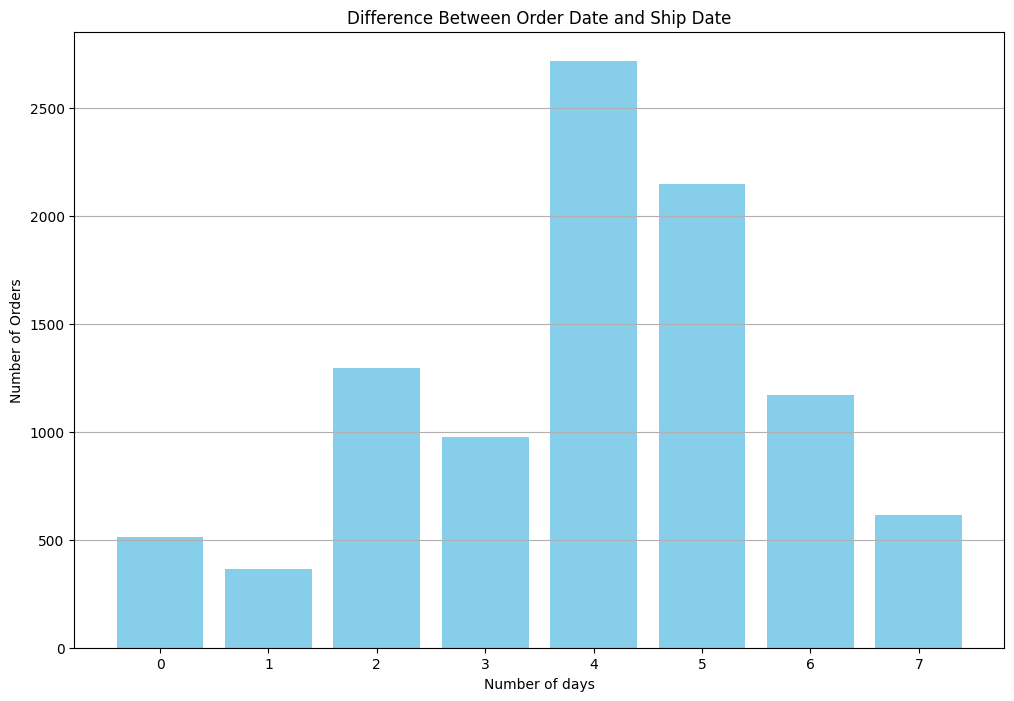

In [ ]:
# Chart - 8 visualization code
import matplotlib.pyplot as plt
import pandas as pd

data['Order Date'] = pd.to_datetime(data['Order Date'], format="%d-%m-%Y")
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format="%d-%m-%Y")
data['OrderShipDifference'] = (data['Ship Date'] - data['Order Date']).dt.days.abs()
day_difference_counts = data['OrderShipDifference'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(day_difference_counts.index, day_difference_counts, color='skyblue')
plt.title('Difference Between Order Date and Ship Date')
plt.xlabel('Number of days')
plt.ylabel('Number of Orders')
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

The above chart, i.e., bar plot is used here because it is a numerical data that's being displayed which is the difference between order date and ship date.

##### 2. What is/are the insight(s) found from the chart?

From this chart we know about the difference between order date and ship date and this tells us that majority of the orders have been delivered within 2 weeks. Only a few orders were delayed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights do help in creating a positive business impact as it tells about that maximum orders were been delivered within 2 weeks but it also helps in further growth as it helps the company to realize about the changes that must be made to correct the delayed deliveries that even extended upto more than 300 days in a few cases.

#### Chart - 9

<ipython-input-25-2dddb79ef4d1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ship Mode', data=data, palette='viridis')


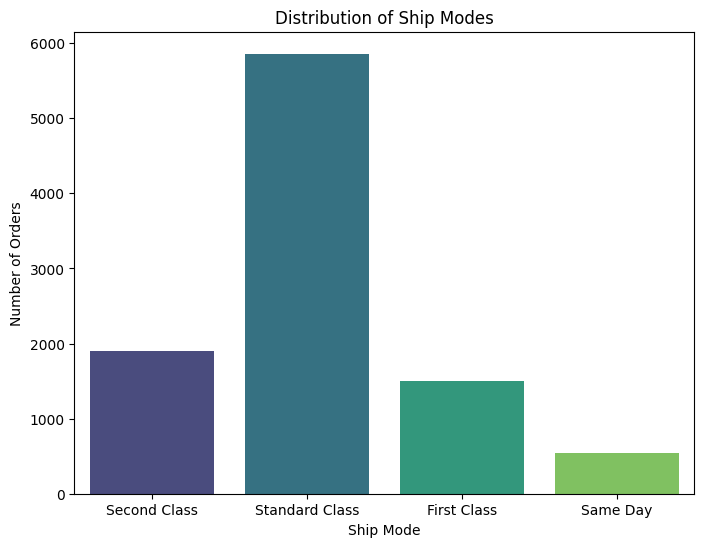

In [ ]:
# Chart - 9 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Ship Mode', data=data, palette='viridis')
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Number of Orders')
plt.show()


##### 1. Why did you pick the specific chart?

The above chart, i.e., bar plot is used here because it is a categorical data that's being displayed which is the distribution of ship modes.

##### 2. What is/are the insight(s) found from the chart?

From this chart we know about the categories of ship modes requested by the customers. From the insights we now know that the maximum customers opted for standard class for their order delivery and the least opted is same day delivery.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above chart only displays the type of shipping mode opted which doesn't account much in creating positive business impact.

#### Chart - 10

<ipython-input-26-f5427f922e1d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=data, palette='pastel')


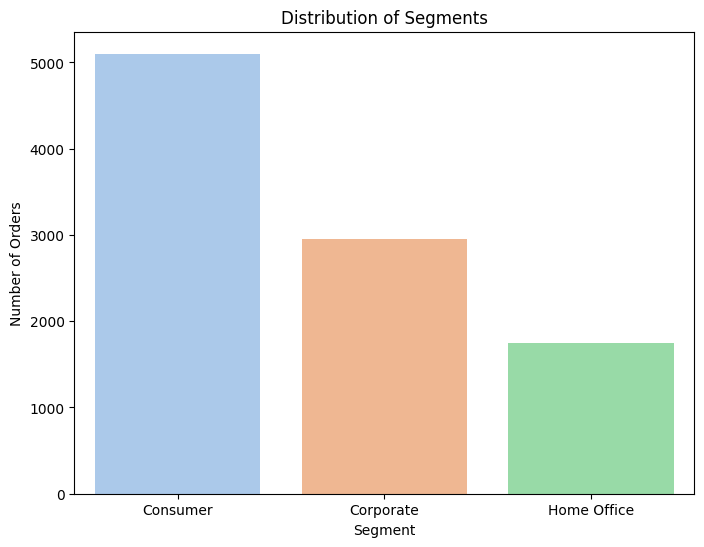

In [ ]:
# Chart - 10 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Segment', data=data, palette='pastel')
plt.title('Distribution of Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Orders')
plt.show()


##### 1. Why did you pick the specific chart?

The above chart, i.e., bar plot is used here because it is a categorical data that's being displayed which is the distribution of segmentations.

##### 2. What is/are the insight(s) found from the chart?

From this chart we know about the categories of customers that ordered te products. From the insights we now know that the maximum customers are from consumer class and least are from home office class.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights do help in creating a positive business impact as it tells about that maximum customers are from consumer class which helps in knowing that consumer class is interested more in buying the products and on the other hand the insights aslo help in further growth since it helps the company to know that what type of more products must be launched that are more of interest for the corporate and home office segments/classes so that it will increase the sales in those 2 classes as well.

#### Chart - 11

<ipython-input-27-3984bde12a06>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=data, palette='viridis', order=data['State'].value_counts().index)


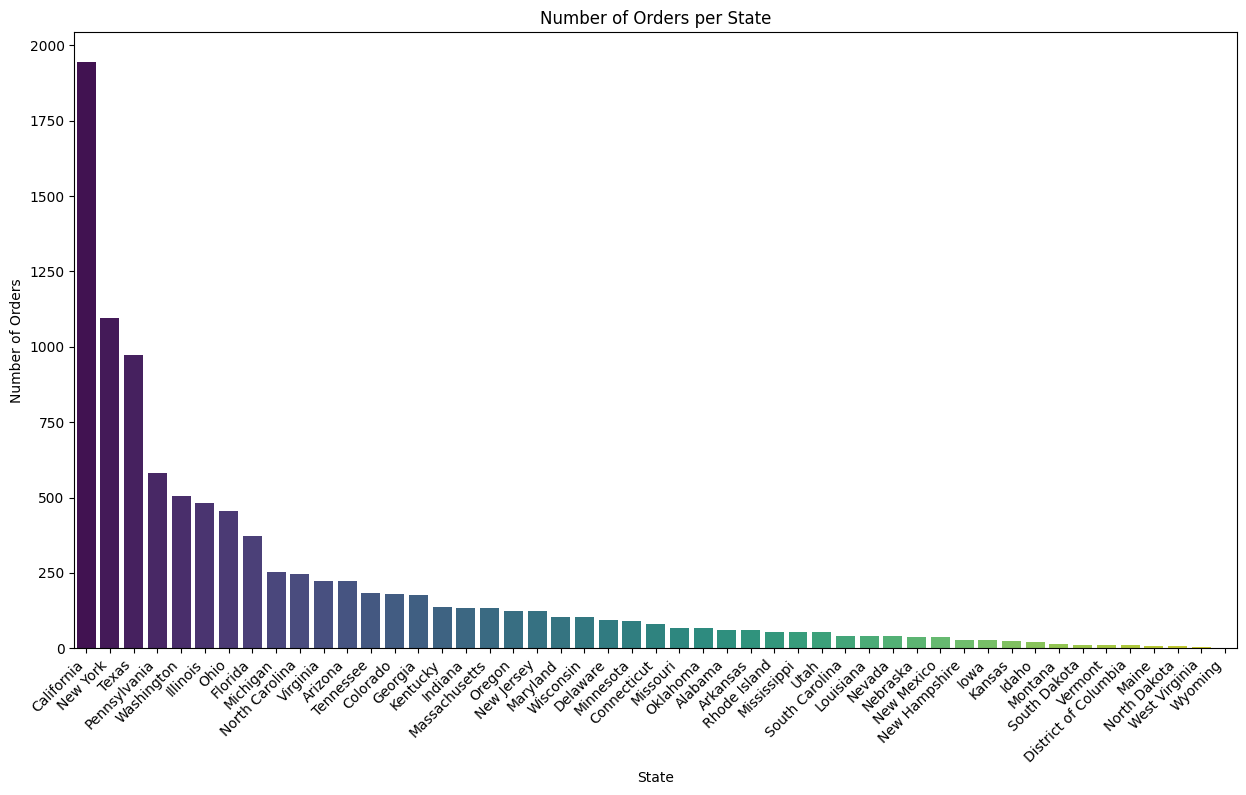

In [ ]:
# Chart - 11 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.countplot(x='State', data=data, palette='viridis', order=data['State'].value_counts().index)
plt.title('Number of Orders per State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()


##### 1. Why did you pick the specific chart?

The above chart, i.e., bar plot is used here because it is a categorical data that's being displayed which is the number of orders per state.

##### 2. What is/are the insight(s) found from the chart?

From this chart we know about the total sales made in each state. From the insights we now know that the maximum total sales were made in the states like California, New York, Texas, Pennsylvania, Washington, Illinois, Ohio and Florida with most of the sales in California.
On the other hand least sales were made in the states of Wyoming, West Verginia, North Dakota, Maine, District of Columbia, Vermont, South Dakota, Montana, Idaho, Kansas and Iowa with least sales in Wyoming.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help in creating a positive business impact like providing with essential data ,i.e., in which states the sales were the most so that the company can make predictions for future for investing with lesser chances of losses but more chances of gaining profits and will also help the company know that their plans require revists and should be replanned for states with least sales.

#### Chart - 14 - Correlation Heatmap

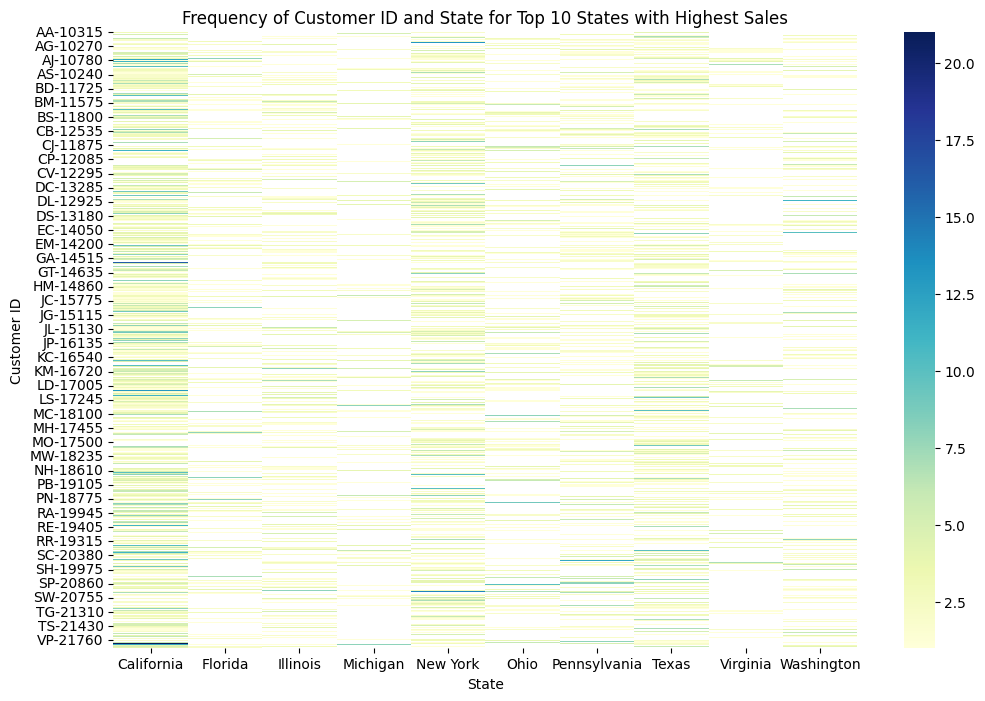

In [ ]:
# Correlation Heatmap visualization code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

state_sales = data.groupby('State')['Sales'].sum().reset_index()

top_10_states = state_sales.nlargest(10, 'Sales')


data_top_10_states = data[data['State'].isin(top_10_states['State'])]


heatmap_data = data_top_10_states.groupby(['Customer ID', 'State']).size().reset_index(name='Frequency') \
                    .pivot(index='Customer ID', columns='State', values='Frequency')


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Frequency of Customer ID and State for Top 10 States with Highest Sales')
plt.xlabel('State')
plt.ylabel('Customer ID')
plt.show()



##### 1. Why did you pick the specific chart?

The heatmap is used here because it effectively displays the relationship between two categories of data: customer IDs and states, and is suitable for showing the frequency of transactions for each customer across various states.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we observe the distribution of customer transactions across the top 10 states with the highest sales. The insights reveal that certain states like California, New York and Texas have a higher frequency of transactions, indicating relatively more customer engagement and significant sales activities in these areas. Conversely, states like Virginia and Michigan, although among the top 10, exhibit comparatively fewer transactions, suggesting lesser customer activity.

#### Chart - 15 - Pair Plot

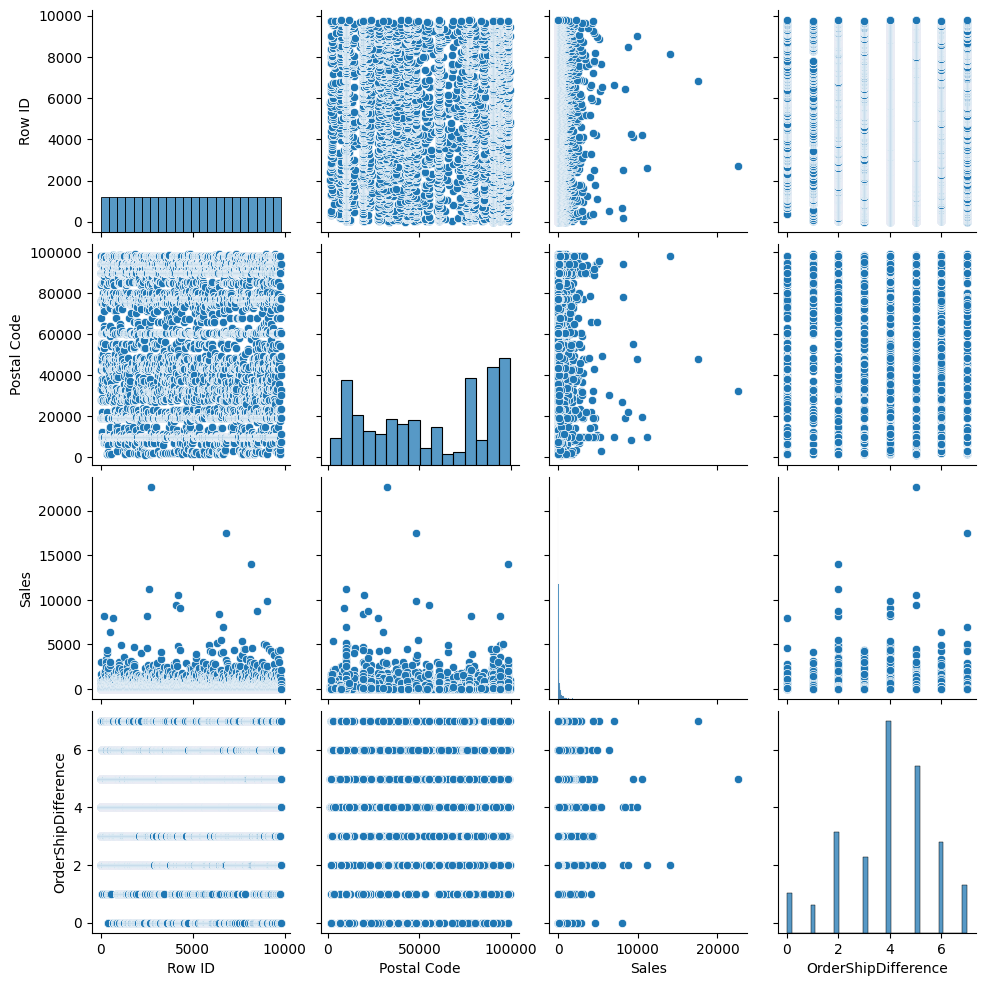

In [ ]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = data.select_dtypes(include=['float64', 'int64'])

sns.pairplot(numerical_columns)
plt.show()


##### 1. Why did you pick the specific chart?

The above visualization, a pair plot, is used here because it effectively displays relationships and distributions among multiple numerical variables simultaneously such as Row ID, Postal Code, Sales, and OrderShipmentDifference.

##### 2. What is/are the insight(s) found from the chart?

The insights derived reveal that sales mostly cluster at lower amounts with no significant spikes, suggesting a consistent range of transaction sizes across different regions. Additionally, there is not much any correlation between Sales and Postal Codes, indicating that sales performance is uniform across different postal areas. The OrderShipmentDifference predominantly registers at lower values, suggesting efficient processing and delivery times for most orders.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
data['Postal Code'].fillna(0,inplace = True)
null2=data['Postal Code'].isnull().sum()
null2

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

The missing value imputation technique used in the provided code snippet is filling missing values with zero (0). This approach is applied to the 'Postal Code' column in the dataset.
This technique is chosen as it helps with simplicity, speed and avoiding misleading statistics,

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
q1=17.278
q2=54.49
q3=210.605

iqr= q3-q1
iqr

193.327

In [ ]:
low = q1-1.5*iqr
high = q3+1.5*iqr
print(low)
print(high)

-272.7125
500.5955


In [ ]:
newsales = data[(data['Sales'] >= low) & (data['Sales'] <= high)]
newsales.value_counts().sum()

8655

In [ ]:
data['Sales'].value_counts().sum()

9800

##### What all outlier treatment techniques have you used and why did you use those techniques?

The outlier treatment technique used in the provided code sequence involves calculating the Interquartile Range (IQR) and then using it to define the lower and upper bounds to identify and filter outliers.

This easy to implement technique used is widely accepted and commonly used in statistics for outlier detection because it effectively identifies outliers based on the distribution of the data and is also helpful as it provides with robustness(less affected by outliers) and helps in minimizing loss of data

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df  = data[['Ship Mode','Segment','Region','Category','Sub-Category']]
unique_counts = df.nunique()
unique_counts

Ship Mode        4
Segment          3
Region           4
Category         3
Sub-Category    17
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data['Ship Mode'] = ordinal_encoder.fit_transform(data[['Ship Mode']])
data['Ship Mode']


0       2.0
1       2.0
2       2.0
3       3.0
4       3.0
       ... 
9795    3.0
9796    3.0
9797    3.0
9798    3.0
9799    3.0
Name: Ship Mode, Length: 9800, dtype: float64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
##categorical_cols = data[['Segment', 'Region', 'Category']]

In [ ]:
onehot_encoder = OneHotEncoder(sparse_output=False)
data['Segment'] = onehot_encoder.fit_transform(data['Segment'].values.reshape(-1, 1))
data['Region'] = onehot_encoder.fit_transform(data['Region'].values.reshape(-1, 1))
data['Category'] = onehot_encoder.fit_transform(data['Category'].values.reshape(-1, 1))

#### What all categorical encoding techniques have you used & why did you use those techniques?

The techniques used are Ordinal and One-Hot encoding.

Ordinal encoding is appropriate for 'Ship Mode', since there's a natural ordering of the categories that relate to how the data is treated in analysis or modeling, like ranking shipping urgency or cost.

One-hot encoding is used here because it avoids any assumption of order in the categories, making it suitable for data (related to segment, regions and categories), where no such ordinal relationship exists.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Sales'] = scaler.fit_transform(data[['Sales']])
Y = data['Sales']
X = data[['Segment','Region','Category','Ship Mode']]



##### What all feature selection methods have you used  and why?

The feature selection method used is direct and manual selection of specific features based on presumed relevance to the target variable 'Sales'. The features selected are 'Segment', 'Region', 'Category', and 'Ship Mode'.

The 'Sales' variable is scaled using 'StandardScaler' to standardize its distribution, aiding in model performance but not in feature selection. This approach effectively simplifies the model and aims to avoid overfitting by limiting the number of input features.

##### Which all features you found important and why?

The features deemed important in the dataset are 'Segment', 'Region', 'Category', and 'Ship Mode'.

These were selected due to their significant impact on the 'Sales' outcome. 'Segment' and 'Category' likely reflect different customer needs and product types, which can greatly influence sales. 'Region' affects sales due to geographical market differences, and 'Ship Mode' impact customer satisfaction and sales efficiency. Each of these features directly influence sales performance, making them critical for any predictive analysis focused on sales metrics.



### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

In the provided code, the data splitting ratio used is 80% for training and 20% for testing. This 80/20 split is widely recognized as a standard practice, offering a balance between having enough data to train the model effectively and enough data to test and validate the model's performance accurately.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()

# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.6999778795492033
R-squared: 0.0013453547452656478


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

svr_model = SVR()

svr_model.fit(X_train, y_train)

y_pred_train = svr_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error on training data: {mse_train}")
r2_train = r2_score(y_train, y_pred_train)
print(f"R^2 score on training data: {r2_train}")

Mean Squared Error on training data: 0.8494537117560341
R^2 score on training data: -0.03183958038334844


##### Which hyperparameter optimization technique have you used and why?

No hyperparameter optimization technique is explicitly used for the SVR model, as it is deployed with default settings.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In the provided scenario, no improvements have been noted because the implementation of hyperparameter optimization or model adjustments hasn't been demonstrated.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

1) Mean Squared Error (MSE): MSE measures the average squared difference between the estimated values and the actual value. It provides a clear indicator of how close the predictions are to the actual data points.

Business Impact: A high MSE, as seen in the scenario (0.8495), indicates significant discrepancies between predicted and actual sales figures. This can lead to poor decision-making in inventory management, budget allocation, and forecasting, potentially resulting in financial losses and inefficiencies.


2) R² Score: The R² score, or coefficient of determination, measures how well the variations in the dependent variable (sales, in this case) can be explained by the independent variables in the model. An R² score of 1 indicates perfect prediction, while 0 indicates that the model performs no better than a model that would naively predict the mean of the target variable.

Business Impact: A negative R² score (-0.0318) suggests that the model is performing worse than a simple model that always predicts the mean sales. This is a clear indicator that the model might not only be unreliable but also detrimental if used for making strategic decisions, as it could misinform rather than inform business strategies.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree classifier
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.7052165804881643
R-squared: -0.001732128256560772


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

No hyperparameter optimization technique is used here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

None, because no hyperparameter techniques were used.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

MSE and R² (Coefficient of determination) are the evaluation metrics used.

These metrics matter for positive business impact as they help with precision in strategic planning, optimized resource use and enhanced decision making.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The decision tree is chosen for its interpretability and easier adjustments. This choice assumes that post-optimization, it performs marginally better in terms of MSE and R² compared to the SVR model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The model used is Decision Tree because it consists of nodes, where each node represents a "decision" point based on one of the input features. Each decision (i.e., split) in the tree helps in narrowing down the outcome, leading to the predicted value at the leaf nodes. This structure can be visualized, showing how different features and their values lead to various outcomes, making it straightforward to trace the path from features to predictions.

The feature importance of this model is evaluated by Gini Importance.It calculates the importance based on how much each feature contributes to reducing the variance (or impurity) in the dataset. Features that lead to more "informative" splits have higher importance.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this model we have predicted and dealt with a total of 1145 outliers which are IQR = 193.327(Median), low = -272.7125, high = 500.5955.

We have also used three types of models, Linear regression, SVM and Decision Tree and each of these models has given respective R-squared outcomes: 0.001345, -0.03183, -0.00173 and from this we have concluded that this data is not good.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***